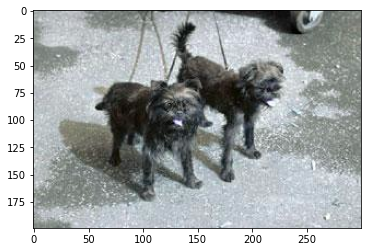

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from numpy import expand_dims
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

DATADIR = "/Users/joangomezalvarez/Desktop/Joan/whatelse/dogDataset/dogs"
CATEGORIES = ["Affenpinscher", "Afghan_hound", "African_hunting_dog", "Airedale", "Alaskan_Malamute", 
              "American_Staffordshire_terrier", "Appenzeller", "Australian_terrier", "Basenji", "Basset", 
              "Beagle", "Bedlington_terrier", "Bernese_mountain_dog", "Black_and_tan_coonhound", 
              "Blenheim_spaniel", "Bloodhound", "Bluetick", "Border_collie", "Border_terrier", "Borzoi", 
              "Boston_bull", "Bouvier_des_Flandres", "Boxer", "Brabancon_griffon", "Briard", 
              "Brittany_spaniel", "Bull_mastiff", "Cairn", "Cardigan", "Chesapeake_Bay_retriever", 
              "Chihuahua", "Chow", "Clumber", "Cocker_spaniel", "Collie", "Curly_coated_retriever",
              "Dandie_Dinmont", "Dhole", "Dingo", "Doberman", "English_foxhound", "English_setter",
              "English_springer", "EntleBucher", "Eskimo_dog", "Flat_coated_retriever", "French_bulldog", 
              "German_shepherd", "German_short_haired_pointer", "Giant_schnauzer", "Golden_retriever",
              "Gordon_setter", "Great_Dane", "Great_Pyrenees", "Greater_Swiss_Mountain_dog", "Groenendael",
              "Ibizan_hound", "Irish_setter", "Irish_terrier", "Irish_water_spaniel", "Irish_wolfhound",
              "Italian_greyhound", "Japanese_spaniel", "Keeshond", "Kelpie", "Kerry_blue_terrier",
              "Komondor", "Kuvasz", "Labrador_retriever", "Lakeland_terrier", "Leonberg",
              "Lhasa", "Malinois", "Maltese_dog", "Mexican_hairless", "Miniature_pinscher",
              "Miniature_poodle", "Miniature_schnauzer", "Newfoundland", "Norfolk_terrier",
              "Norwegian_elkhound", "Norwich_terrier", "Old_English_sheepdog", "Otterhound",
              "Papillon", "Pekinese", "Pembroke", "Pomeranian", "Pug", "Redbone",
              "Rhodesian_ridgeback", "Rottweiler", "Saint_Bernard", "Saluki", "Samoyed",
              "Schipperke", "Scotch_terrier", "Scottish_deerhound", "Sealyham_terrier",
              "Shetland_sheepdog", "Shih_Tzu", "Siberian_husky", "Silky_terrier",
              "Soft_coated_wheaten_terrier", "Staffordshire_bullterrier", "Standard_poodle",
              "Standard_schnauzer", "Sussex_spaniel", "Tibetan_mastiff", "Tibetan_terrier", "Toy_poodle",
              "Toy_terrier", "Vizsla", "Walker_hound", "Weimaraner", "Welsh_springer_spaniel",
              "West_Highland_white_terrier", "Whippet", "Wire_haired_fox_terrier", "Yorkshire_terrier"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(img_array)
        plt.show()
        break
    break

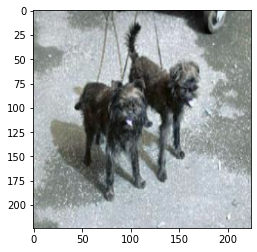

In [3]:
IMG_SIZE = 224

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [5]:
X = []
y = []
def horitAugm(X, y, samples, class_num):
    # create image data augmentation generator horitzontal
    hDatagen = ImageDataGenerator(width_shift_range=[-200,200])
    # prepare iterator
    it = hDatagen.flow(samples, batch_size=1)
    # generate samples and plot
    for i in range(1):
        # generate batch of images
        batch = it.next()
        # convert to unsigned integers for viewing
        image = batch[0].astype('uint8')
        X.append(image)
        y.append(class_num)

def verticalAugm(X, y, samples, class_num):
    # create image data augmentation generator Vertical
    vDatagen = ImageDataGenerator(height_shift_range=0.5)
    # prepare iterator
    it = vDatagen.flow(samples, batch_size=1)
    # generate samples and plot
    for i in range(1):
        # generate batch of images
        batch = it.next()
        # convert to unsigned integers for viewing
        image = batch[0].astype('uint8')
        X.append(image)
        y.append(class_num)
        #training_data.append([image, class_num])

def horitFlipAugm(X, y, samples, class_num):
    # create image data augmentation generator horitzontalFlip
    hFlipDatagen = ImageDataGenerator(horizontal_flip=True)
    # prepare iterator
    it = hFlipDatagen.flow(samples, batch_size=1)
    # generate samples and plot
    for i in range(1):
        # generate batch of images
        batch = it.next()
        # convert to unsigned integers for viewing
        image = batch[0].astype('uint8')
        X.append(image)
        y.append(class_num)

def verticalFlipAugm(X, y, samples, class_num):
    # create image data augmentation generator verticalFlip
    vFlipDatagen = ImageDataGenerator(vertical_flip=True)
    # prepare iterator
    it = vFlipDatagen.flow(samples, batch_size=1)
    # generate samples and plot
    for i in range(1):
        # generate batch of images
        batch = it.next()
        # convert to unsigned integers for viewing
        image = batch[0].astype('uint8')
        X.append(image)
        y.append(class_num)

def rotationAugm(X, y, samples, class_num):
    # create image data augmentation generator Rotation 90 degrees
    rotationDatagen = ImageDataGenerator(rotation_range=90)
    # prepare iterator
    it = rotationDatagen.flow(samples, batch_size=1)
    # generate samples and plot
    for i in range(1):
        # generate batch of images
        batch = it.next()
        # convert to unsigned integers for viewing
        image = batch[0].astype('uint8')
        X.append(image)
        y.append(class_num)

def zoomAugm(X, y, samples, class_num):
    # create image data augmentation generator Zoom range
    zoomRangeDatagen = ImageDataGenerator(zoom_range=[0.5,1.0])
    # prepare iterator
    it = zoomRangeDatagen.flow(samples, batch_size=1)
    # generate samples and plot
    for i in range(1):
        # generate batch of images
        batch = it.next()
        # convert to unsigned integers for viewing
        image = batch[0].astype('uint8')
        X.append(image)
        y.append(class_num)
        
def brightnessAugm(X, y, samples, class_num):
    # create image data augmentation generator Random Brightness
    brightnessDatagen = ImageDataGenerator(brightness_range=[0.2,1.0])
    # prepare iterator
    it = brightnessDatagen.flow(samples, batch_size=1)
    # generate samples and plot
    for i in range(1):
        # generate batch of images
        batch = it.next()
        # convert to unsigned integers for viewing
        image = batch[0].astype('uint8')
        X.append(image)
        y.append(class_num)

def dataAugmentation(X, y, samples, class_num):

    horitAugm(X, y, samples, class_num)
    verticalAugm(X, y, samples, class_num)

    horitFlipAugm(X, y, samples, class_num)
    verticalFlipAugm(X, y, samples, class_num)

    rotationAugm(X, y, samples, class_num)

    brightnessAugm(X, y, samples, class_num)
    zoomAugm(X, y, samples, class_num)

In [6]:
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_image_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                X.append(new_image_array)
                y.append(class_num)
                samples = expand_dims(new_image_array, 0)
                dataAugmentation(X, y, samples, class_num)
            except Exception as e:
                print(e)

create_training_data()

In [7]:
from sklearn.model_selection import train_test_split

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, stratify=y, random_state=42)

In [8]:
X_train = X_train.astype('float32') / 255
X_test  = X_test.astype('float32') / 255

In [9]:
import tensorflow as tf

num_classes = len(np.unique(y_train))

y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_onehot  = tf.keras.utils.to_categorical(y_test,  num_classes)

In [10]:
from keras_efficientnets import EfficientNetB0

conv_base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=X_train[0].shape)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation
from keras.constraints import maxnorm

model = Sequential()
model.add(conv_base)

model.add(Flatten(name='Flatten1'))
model.add(Dropout(0.2))

model.add(Dense(20384, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(5096, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(1024, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(256, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(len(CATEGORIES), activation='softmax', name="Dense2-output"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Functional)           (None, 7, 7, 1280)        4049564   
_________________________________________________________________
Flatten1 (Flatten)           (None, 62720)             0         
_________________________________________________________________
dropout (Dropout)            (None, 62720)             0         
_________________________________________________________________
dense (Dense)                (None, 20384)             1278504864
_________________________________________________________________
activation_16 (Activation)   (None, 20384)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 20384)             0         
_________________________________________________________________
batch_normalization_49 (Batc (None, 20384)             8

In [14]:
from tensorflow.keras import optimizers

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
train_size = len(X_train)

39102


In [17]:
checkpoint_filepath = ''
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [18]:
epochs = 15
history = model.fit(X_train[:train_size], y_train_onehot[:train_size], validation_split=0.1, batch_size=64, epochs=epochs, callbacks=[model_checkpoint_callback])

Epoch 1/15
550/550 [==============================] - 20959s 38s/step - loss: 3.1099 - accuracy: 0.2802 - val_loss: 1.5200 - val_accuracy: 0.5945
Epoch 2/15
550/550 [==============================] - 20801s 38s/step - loss: 1.0115 - accuracy: 0.6972 - val_loss: 1.1791 - val_accuracy: 0.6635
Epoch 3/15
550/550 [==============================] - 20887s 38s/step - loss: 0.6354 - accuracy: 0.8042 - val_loss: 1.0178 - val_accuracy: 0.7213
Epoch 4/15
550/550 [==============================] - 20973s 38s/step - loss: 0.4631 - accuracy: 0.8577 - val_loss: 0.9635 - val_accuracy: 0.7533
Epoch 5/15
550/550 [==============================] - 20985s 38s/step - loss: 0.3972 - accuracy: 0.8792 - val_loss: 0.8018 - val_accuracy: 0.7770
Epoch 6/15
550/550 [==============================] - 21529s 39s/step - loss: 0.3512 - accuracy: 0.8924 - val_loss: 0.6347 - val_accuracy: 0.8233
Epoch 7/15
550/550 [==============================] - 21131s 38s/step - loss: 0.3267 - accuracy: 0.9011 - val_loss: 0.6289 -

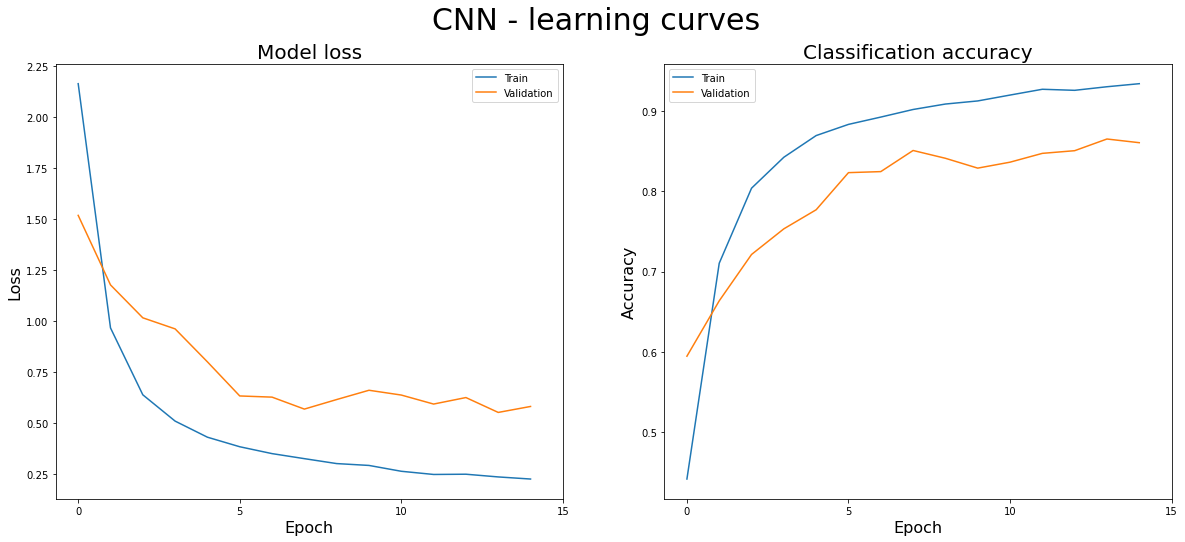

In [19]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (20, 8))

ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Model loss', size=20)
ax1.set_ylabel('Loss', size=16)
ax1.set_xlabel('Epoch', size=16)
ax1.set_xticks(range(0, epochs+1, 5))
ax1.legend(['Train', 'Validation'], loc='upper right')

ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.set_title('Classification accuracy', size=20)
ax2.set_ylabel('Accuracy', size=16)
ax2.set_xlabel('Epoch', size=16)
ax2.set_xticks(range(0, epochs+1, 5))
ax2.legend(['Train', 'Validation'], loc='upper left')

fig.suptitle('CNN - learning curves', size=30)

plt.show()

In [20]:
loss, acc = model.evaluate(X_test, y_test_onehot, verbose=2)

65/65 - 68s - loss: 0.5925 - accuracy: 0.8503


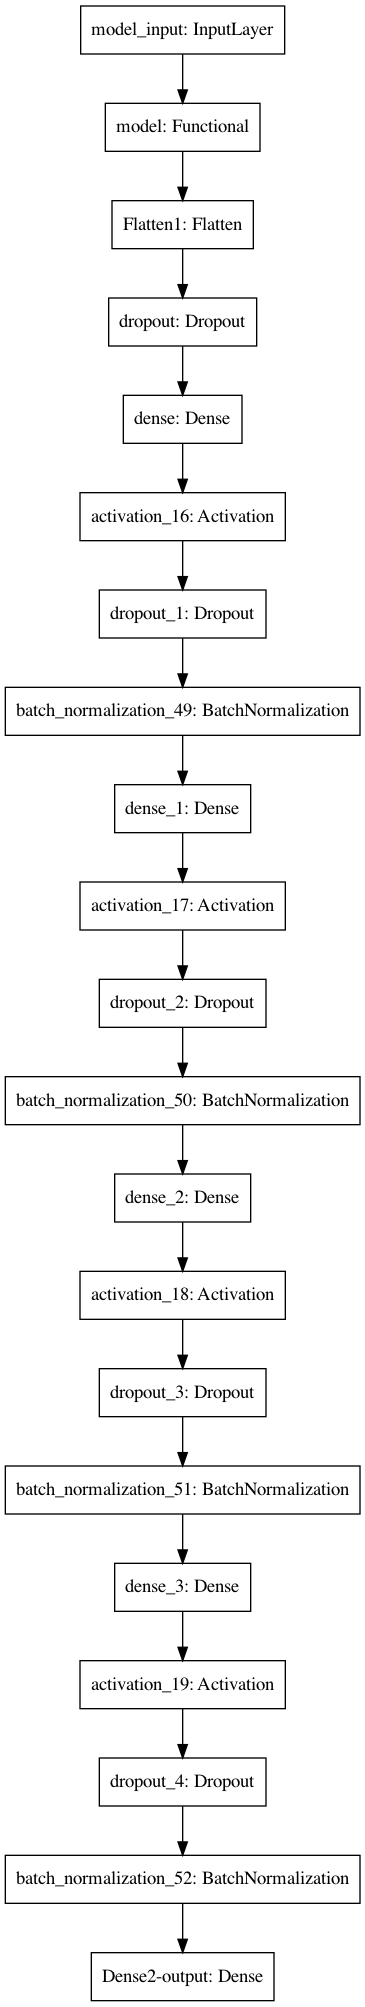

In [14]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

In [16]:
checkpoint_filepath = ''
model.load_weights(checkpoint_filepath)

In [17]:
loss, acc = model.evaluate(X_test, y_test_onehot, verbose=2)

65/65 - 61s - loss: 0.5329 - accuracy: 0.8683


In [24]:
predictions = model.predict(X_test)
print(predictions)

[[1.0291679e-06 2.0796167e-06 4.1200590e-07 ... 5.8234233e-05
  1.3076177e-02 2.6610705e-06]
 [7.2708247e-08 3.3794507e-07 1.7232722e-06 ... 3.6849315e-06
  3.2869005e-07 3.9789573e-08]
 [2.1539165e-11 9.9999940e-01 3.3878928e-12 ... 2.8890037e-09
  1.0209060e-11 2.9878527e-10]
 ...
 [2.4251221e-08 1.3876498e-06 1.4330993e-07 ... 1.4002081e-06
  7.3649282e-08 1.3930848e-08]
 [4.1114788e-07 9.1548054e-07 1.9032001e-06 ... 5.7303026e-07
  5.0782336e-07 8.3968604e-07]
 [1.1836397e-05 2.0332713e-07 2.5496795e-06 ... 2.6702629e-08
  7.0479487e-05 3.0683161e-05]]


In [25]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_onehot.argmax(axis=1), predictions.argmax(axis=1))

array([[13,  0,  0, ...,  0,  0,  0],
       [ 0, 23,  0, ...,  0,  0,  0],
       [ 0,  1, 10, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  9,  0,  0],
       [ 0,  0,  0, ...,  0, 15,  0],
       [ 0,  0,  0, ...,  0,  0, 16]])